<h2> Tugas Sentiment Analysis </h2>
<h3> Anggota Kelompok</h3>
<ul>
    <li>Muhammad Jovan Adiwijaya Yanuarsyah 5027201025</li>
    <li>Muhammad Hilmi Azis 5027201049</li>
    <li>Dzaki Indra Cahya 5027201053</li>
</ul>

## EDA

In [45]:
import re
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [46]:
df = pd.read_csv('C:/Users/mjova/OneDrive/Documents/kuliah/Semester6/AI/SentimentAnalysis/Reviews And Ratings.csv')

In [47]:
df.head(10)

,Unnamed: 0,Rating,Lang,Type,Country,Date,Helpful,translated
0,72,5,it,Verified,Italy,11/1/2020,43.0,What to say? My daughter LOVES him and I with ...
1,85,5,it,Not Verified,Italy,9/10/2019,36.0,"I decided to test this plush to my grandson, j..."
2,107,5,it,Verified,Italy,8/12/2019,2.0,"An unusual pet, this otter is beautiful! Cute ..."
3,109,4,it,Verified,Italy,4/2/2021,1.0,"Beautiful, soft and very relaxing. It comes wi..."
4,113,4,it,Verified,Italy,21/02/2020,2.0,"Plush tender, my 16-month-old loves it, sleeps..."
5,115,5,it,Verified,Italy,12/11/2019,3.0,"I love it, simply. I bought it after seeing it..."
6,116,5,it,Verified,Italy,25/10/2019,5.0,"Beautiful product, the only problem and that t..."
7,125,5,it,Verified,Italy,7/8/2020,2.0,Perfect!! Relaxed very much my son of 4 months...
8,138,5,it,Verified,Italy,25/04/2020,NaN,The otter accompanies the dwarfs of my baby wi...
9,146,2,it,Verified,Italy,23/11/2020,NaN,"Functional carillon, my 4 month old girl falls..."


## Penyebaran Rating Produk

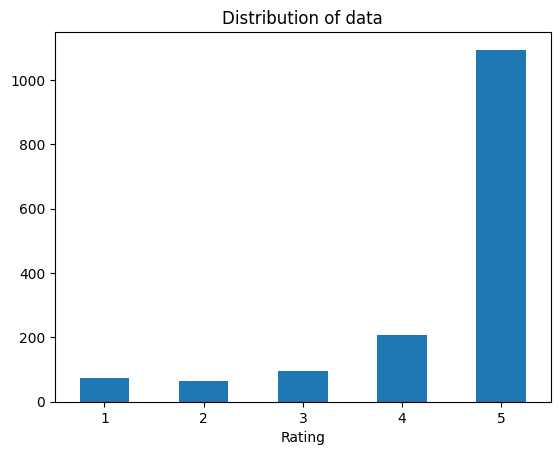

In [48]:
dataset = df[['Rating','translated']]

# Plotting the distribution for dataset.
ax = dataset.groupby('Rating').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['1','2','3','4','5'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['translated']), list(dataset['Rating'])

## Preprocessing Text

In [49]:
import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# Create stopword list:
STOP_WORDS.add('otter')
stopwords = set(list(STOP_WORDS) +list(stopwords.words()))
stopwords.update(["br", "href", 'https'])
text = " ".join(desc for desc in df.translated)

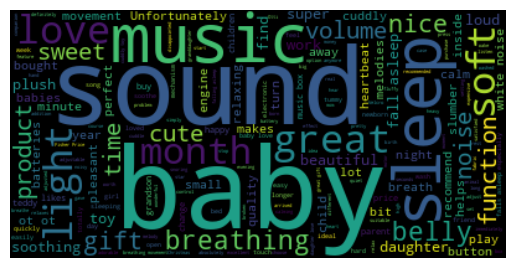

In [50]:
from wordcloud import WordCloud

textt = " ".join(desc for desc in df.translated)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Menghilangkan Rating yang bernilai 0

In [51]:
df = df[df['Rating'] != 0]
#membuat sentimen positif dan negatif +1 dan -1 berdasarkan rating
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

In [52]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

## WordCloud untuk sampel positif

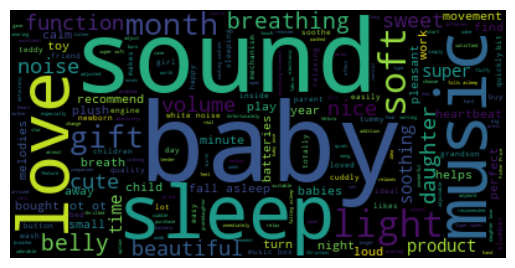

In [53]:
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in positive.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud22.png')
plt.show()

In [54]:
#mencari kata positif yang mengandung nama produk yaitu otter
for i in positive[positive['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy! 

I decided to test this plush to my grandson, just three years old. As soon as he saw it he was very happy and he exclaimed it was: "Zia, it's very soft!" Actually the plush is really soft to the touch and a real companion for the nights, of our children. The animal represented is a gray otter, a toy animal that is able to help children play and also relax, during the night and during the time they rest. This otter is able to emit vibrations that calm and relax the child, but also of music, very sweet. It is su

## WordCloud untuk sampel negatif

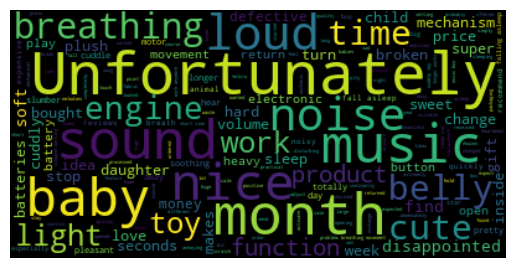

In [55]:
neg = " ".join(review for review in negative.translated)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [56]:
#mencari kata negatif yang mengandung nama produk yaitu otter   
for i in negative[negative['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

The mechanism is a little noisy when “breathing” and if the tummy touches baby when the otter takes a breath, the gentle pressure it creates turns the otter off. But I love the sounds and the light, their is a volume control which is great. Overall I like it, just wish it wasnt as sensitive. 

Super cute toy and very soft. I like that you can choose all the setting to personalize the otter like the sounds, volume, light and so on. The only thing I dont love is when you have the belly function on it make sort of a robotic noise and if baby is holding it tightly it makes a clicking noise as it tries to move. Overall great toy but a little bit pricey for a musical stuffed animal. 

The controller inside of otter is too chunky and hard. I was expecting very soft snuggly toy for nighttime. my 1 1/2 old throw it out from crib all the time. She doesn’t like it.... :(  other than that, it works fine. 

The button to activate this is on the otter's tummy and very sensitive.  So, if my upset bab

## Penyebaran sentimen dari sampel

In [57]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [58]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['translated'] = df['translated'].apply(remove_punctuation)
df = df.dropna(subset=['translated'])
df['translated'] = df['translated'].apply(remove_punctuation)

## Membuat dataset sentimen dengan reviewnya 

In [59]:
dfNew = df[['translated','sentiment']]
dfNew.head(10)

,translated,sentiment
0,What to say My daughter LOVES him and I with h...,1
1,"I decided to test this plush to my grandson, j...",1
2,"An unusual pet, this otter is beautiful Cute m...",1
3,"Beautiful, soft and very relaxing It comes wit...",1
4,"Plush tender, my 16-month-old loves it, sleeps...",1
5,"I love it, simply I bought it after seeing it ...",1
6,"Beautiful product, the only problem and that t...",1
7,"Perfect Relaxed very much my son of 4 months, ...",1
8,The otter accompanies the dwarfs of my baby wi...,1
9,"Functional carillon, my 4 month old girl falls...",-1


## Menyiapkan data untuk dijadikan model

In [60]:
# split data menjadi data training dan data testing
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [61]:
# mengubah data training dan data testing menjadi bentuk matriks 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['translated'])
test_matrix = vectorizer.transform(test['translated'])

In [62]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Cross Validation

              precision    recall  f1-score   support

          -1       0.63      0.54      0.58        50
           1       0.93      0.95      0.94       300

    accuracy                           0.89       350
   macro avg       0.78      0.74      0.76       350
weighted avg       0.88      0.89      0.89       350



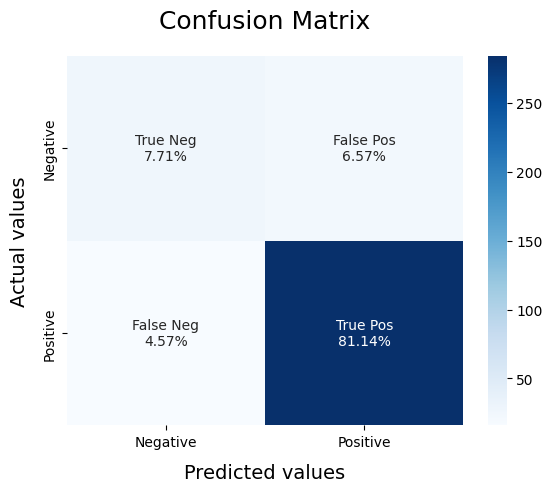

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

          -1       0.29      0.12      0.17        50
           1       0.87      0.95      0.91       300

    accuracy                           0.83       350
   macro avg       0.58      0.53      0.54       350
weighted avg       0.78      0.83      0.80       350



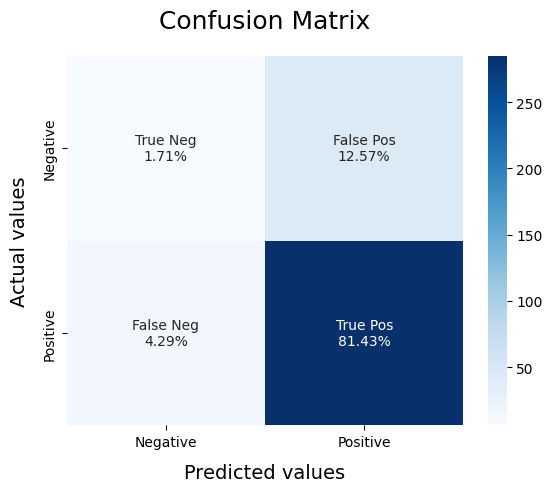

In [65]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

          -1       0.53      0.48      0.51        50
           1       0.91      0.93      0.92       300

    accuracy                           0.87       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.86      0.87      0.86       350



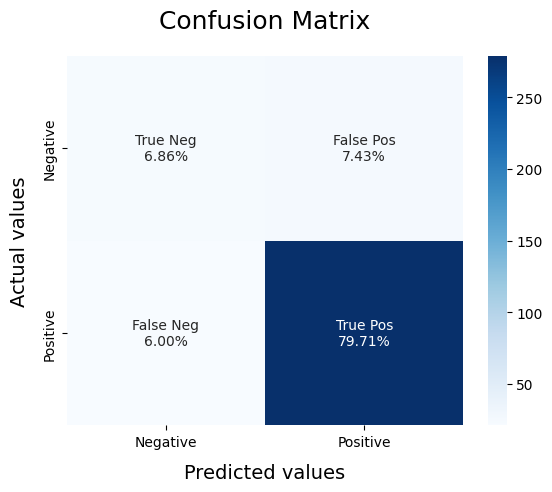

In [66]:
# Linear SVC
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)